In [1]:
TUMOR = 'INTESTINAL'

# LIBS

In [2]:
# Standard library
import os
import glob
import warnings

# Data handling and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model loading
import joblib

# Scikit-learn: model evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Suppress warnings
warnings.filterwarnings('ignore')


# FILES

In [3]:
df = pd.read_csv(f'../../datasets/{TUMOR}.csv', index_col=0)

X = df.loc[:,['CCI', 'GDS-SF', 'IPAQ-SF', 'KATZ', 'KPS', 'MMSE', 'MNA-SF', 'Polypharmacy', 'TUG', 
              'Hemoglobin', 'Leukocyte', 'Platelet', 'Creatinine']]

y = df.loc[:,'Death (180 Days)']

# Logistic Regression Model

In [4]:
# Direct path to the Logistic Regression model
model_path = os.path.join('models', TUMOR, 'LR.joblib')

# Load the model
lr_model = joblib.load(model_path)

# Display the loaded model
print(lr_model)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('imputation', KNNImputer(n_neighbors=10, weights='distance')),
                ('balancing',
                 RandomOverSampler(random_state=42, sampling_strategy=1.0)),
                ('logisticregression',
                 LogisticRegression(C=0.0016931463581925927,
                                    class_weight='balanced', max_iter=200,
                                    multi_class='auto', random_state=42,
                                    solver='saga',
                                    tol=0.0001840942369660678))])


# Generate predictions using 5-fold cross-validation

In [5]:
y_pred = cross_val_predict(lr_model, X, y.values.ravel(), cv=5)
y_proba = cross_val_predict(lr_model, X, y.values.ravel(), cv=5, method='predict_proba')[:, 1]

# Classification report


In [6]:
print("Classification Report:")
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.77      0.83       250
        True       0.33      0.60      0.42        47

    accuracy                           0.74       297
   macro avg       0.62      0.68      0.63       297
weighted avg       0.82      0.74      0.77       297



# Confusion matrix


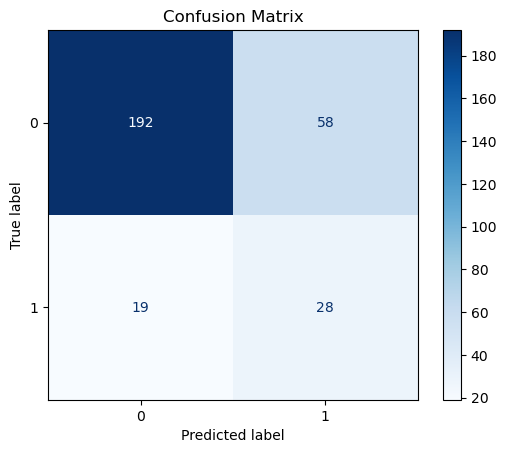

In [7]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC curve

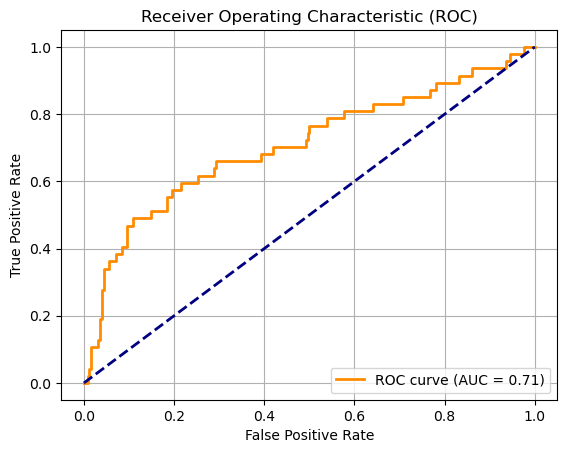

In [8]:
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()